# WeRateDogs 推特数据分析项目

  
本项目根据项目要求首先进行了数据收集，收集了要求处理的三部分数据，然后针对收集的数据进行了数据评估，发现了数据集在质量和整洁度上的问题，之后从后续分析的角度对发现的数据集中存在的问题进行了数据清理，并存储在新的文件中，最后对数据集提出问题，进行了数据分析，得出了一些结论。


## 数据收集

根据项目要求，需要收集三部分数据：

*  1.WeRateDogs 的推特档案

* 2.推特图像的预测数据

* 3.每条推特的额外附加数据

以下代码为收集数据步骤
### 1.WeRateDogs 的推特档案

WeRateDogs 的推特档案数据已经从项目介绍-项目细节中下载，直接读取为DataFrame。

In [1]:
import pandas as pd

In [2]:
#读取WeRateDogs 的推特档案
tae = pd.read_csv('twitter-archive-enhanced.csv')

### 2.推特图像的预测数据

根据 项目介绍-项目细节 中的说明，使用Python 的 Requests 库读取提供的URL，下载保存并读取为DataFrame。

In [3]:
import os
import requests

In [4]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
#写入文件
with open( url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [5]:
#读取推特图像的预测数据文件
ip = pd.read_csv('image-predictions.tsv' , sep = '\t')

### 3.每条推特的额外附加数据

由于无法访问Twitter，使用项目提供的数据集，读取json文件。

In [6]:
#读取提供的每条推特额外附加数据
tweet_json_data = pd.read_json('tweet_json.txt', lines = True)

根据项目要求，额外附加数据需要至少包含tweet，retweet_count，favorite_count列，查看数据集情况后从中选取必要数据。

In [7]:
#查看tweet_json_data列名
list(tweet_json_data)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [8]:
#查看项目相关的必要几列
tweet_json_data[['id','id_str', 'retweet_count', 'favorite_count']].sample(5)

,id,id_str,retweet_count,favorite_count
2085,670789397210615808,670789397210615808,254,698
1283,708356463048204288,708356463048204288,1511,3907
2333,666268910803644416,666268910803644416,37,108
2263,667524857454854144,667524857454854144,1191,1792
405,823581115634085888,823581115634085888,3020,14336


选择tweet_json_data中的id，retweet_count，favorite_count列为参与分析的数据集，并将id列重命名为tweet_id

In [9]:
td = tweet_json_data[['id', 'retweet_count', 'favorite_count']]
td = td.rename(columns = {'id': 'tweet_id'})

In [10]:
list(td)

['tweet_id', 'retweet_count', 'favorite_count']

## 数据评估

对三个数据集进行评估，并整理出数据集的整洁度问题和质量问题。

 **1.tae表评估，记录问题** 

In [11]:
#观察tae表
tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,None,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [12]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

tae表共2356行，17列，各列含义为:  
tweet_id -推特id  
in_reply_to_status_id -回复状态id  
in_reply_to_user_id -回复用户id  
timestamp -发推时间  
source -推文来源  
text - 推文内容  
retweeted_status_id -转发状态id  
retweeted_status_user_id -转发状态用户id  
retweeted_status_timestamp -转发状态时间  
expanded_urls -拓展网址  
rating_numerator -评分分子  
rating_denominator -评分分母  
name -名字  
doggo -狗的成长阶段，比puppo，pupper大，比floofer小  
floofer -狗的成长阶段，比doggo大  
pupper - 狗的成长阶段，比puppo小  
puppo - 狗的成长阶段，比pupper大，比doggo小

从数据集采样和信息上来看，tae表中，有以下情况：
- tweet_id数据类型为int型
- in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，expanded_urls列存在缺失值  
- timestamp，retweeted_status_timestamp两列与时间相关的数据格式为object，非时间格式  
- doggo，floofer，pupper，puppo分别表示狗的成长阶段，却分别放在四列中表示

In [13]:
#有些列文本显示不全，调整显示列数和列宽
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 200)
tae[['source', 'text', 'rating_numerator', 'rating_denominator']].sample(5)

,source,text,rating_numerator,rating_denominator
722,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Earl. He can't catch. Did his best tho. 11/10 would repair confidence with extra pats https://t.co/IsqyvbjFgM,11,10
969,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo,11,10
7,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10
21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic https://t.co/PhrUk20Q64,13,10
1156,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs,11,10


从上表采样中可以看出，source列存在网址信息，真正的来源应为文本中的如“Twitter for iPhone”此类的信息

In [14]:
#tweet_id列的重复值
tae.tweet_id.duplicated().sum()

0

In [15]:
#text列的重复值
tae.text.duplicated().sum()

0

In [16]:
#查看评分分子的有效性
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
#评分分子大于分母且分子大于100
tae[['tweet_id', 'text','rating_numerator', 'rating_denominator']][(tae['rating_numerator'] > tae['rating_denominator']) & (tae['rating_numerator'] >100)]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


评分分子中有大量超过10的评分分子，并且在比评分分子比分母大而且分子大于100的数据中，这些数据有的与‘text’列中描述不符

In [18]:
#查看评分分母的有效性
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

rating_denominator列存在分母不为10的数据，在之前的观察中，text列存放了评分的分子分母，查看这些数据

In [19]:
tae[['text', 'rating_numerator', 'rating_denominator']][tae['rating_denominator'] != 10]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


这些评分分母非10的数据应该是收集数据时出现的错误，继续评估其他列数据

In [20]:
#name列有效性评估
tae.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Buddy         7
Toby          7
Daisy         7
an            7
Bailey        7
Jax           6
Milo          6
Bella         6
Jack          6
Oscar         6
Leo           6
Rusty         6
Dave          6
Stanley       6
Scout         6
Koda          6
Phil          5
           ... 
Reptar        1
Binky         1
Billl         1
Tilly         1
Geno          1
Fiji          1
Griswold      1
Diogi         1
Wiggles       1
Henry         1
Grady         1
Asher         1
Rilo          1
Lucia         1
Peanut        1
Zeus          1
Izzy          1
Meera         1
Horace        1
Cecil         1
Terrenth      1
Tuco          1
Stella        1
Chesney       1
Ralphie       1
Strider       1
Donny         1
Grizz         1
Franq         1
his           1
Name: name, Length: 957,

name列有745组数据为‘None’，有55组数据狗的名字为‘a’，‘None’和‘a’显然不是一只狗的名字

In [21]:
#狗的成长阶段情况
tae.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
tae.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
tae.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

狗的成长阶段数据存在大量空值，寻找是否有四个阶段字段都为空的情况

In [25]:
import numpy as np
dogstage = tae[['doggo','pupper','puppo','floofer']].replace('None', np.nan)

In [26]:
dogstage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      97 non-null object
pupper     257 non-null object
puppo      30 non-null object
floofer    10 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [27]:
#查看空值的情况
dogstage.isnull().sum(axis = 1).value_counts()

4    1976
3     366
2      14
dtype: int64

对于空值沿每行统计时，四列数据都为空值即的有1976条数据，说明有1976条数据对应狗无任何阶段数据，有三个空值的有366条，说明有366条数据对应狗有1个阶段数据，有两个空值的有14条数据，说明有14条数据对应狗有两种阶段数据

 **2.tip表评估，记录问题** 

In [28]:
ip.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1262,748977405889503236,https://pbs.twimg.com/media/CmTm-XQXEAAEyN6.jpg,1,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True


In [29]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


ip表共2075行，12列，各列含义：  
tweet_id -推特id  
jpg_url -预测的图像资源链接  
img_num -最可信的预测结果对应的图像编号， 1是推特中的第一张图片  
p1 -算法对推特中图片的一号预测  
p1_conf -算法的一号预测的可信度  
p1_dog -一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等）  
p2 -算法对推特中图片预测的第二种可能性  
p2_conf -算法的二号预测的可信度  
p2_dog -二号预测该图片是否属于“狗”  
p2_conf -算法的三号预测的可信度  
p2_dog -三号预测该图片是否属于“狗”  

从ip表信息中发现，tweet_id列数据类型为int型，非字符串型

In [30]:
#查看tweet_id列冗余值
ip.tweet_id.duplicated().sum()

0

In [31]:
#查看jpg_url列冗余值
ip.jpg_url.duplicated().sum()

66

jpg_url列存在66条重复信息

In [32]:
#预测数据中三次预测都属于狗的数据
ip[(ip['p1_dog'] == False) & (ip['p2_dog'] == False) & (ip['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


三次预测一共有324条数据预测不是狗的品种

In [33]:
#查看p1列的情况
ip.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

 **3.td表评估，记录问题** 

In [34]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


tweet_id数据类型为int，非字符串型

In [35]:
#查看tweet_id冗余
td.tweet_id.duplicated().sum()

0

In [36]:
#查看统计描述
td.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [37]:
#查看三个表的相同列
all_columns = pd.Series(list(tae) + list(ip) + list(td))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

三个表的tweet_id有相同的数据

### 数据评估结果

通过以上数据评估，从项目细节出发，三个数据表在质量和整洁度上存在以下问题：


**数据质量问题**

- tae表：
    - 1.tweet_id数据类型为int型，应转为字符串型
    - 2.in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，expanded_urls列存在缺失值，需要处理
    - 3.timestamp，retweeted_status_timestamp两列与时间相关的数据格式为object，非时间格式，timestamp以+0000为结尾，需要处理
    - 4.source包含了一些html的信息，不是真正的来源，需要处理
    - 5.表示狗评分的分子和分母存在分子是3位数，分母不全为10的情况，可能是提取数据出现问题，需要重新获取评分
    - 6.name列有‘None’，‘a’，‘the’，‘an’这种数据，需要处理
    - 7.表示狗成长阶段的doggo、floofer、pupper、puppo存在空值，还有一条数据对应多个阶段的情况，需要处理
- ip表：
    - 8.tweet_id数据类型为int型，应转为字符串型
    - 9.存在三次预测都不属于狗的数据，需要处理
    - 10.jpg_url列存在冗余值，需要处理
- td表：
    - 11.tweet_id数据类型为int型，应转为字符串型

**数据整洁度问题**

- 1.tae表中表示狗的成长阶段的doggo、floofer、pupper、puppo列分为4列展示，需要合并  
- 2.tae表和ip表都存在一些与项目细节，项目动机无关的数据列，需要删除  
- 3.三个表都有相同的tweet_id列，需要合并  



## 数据清洗

根据评估评估结果，结合项目动机的关键要点，进行定义和清洗

In [38]:
#数据备份
tae_clean = tae.copy()
ip_clean = ip.copy()
td_clean = td.copy()

### 进行清理
**数据质量问题**   
    tae：tweet_id数据类型为整型，应转为字符串型  
    ip表：tweet_id数据类型为int型，应转为字符串型  
    td表：tweet_id数据类型为int型，应转为字符串型  
**数据整洁度问题**  
    三个表都有相同的tweet_id列，需要合并

**定义：**  
为了方便操作，使用merge方法合并数据集按tweet_id合并数据集，然后将tweet_id的数据格式转为字符串型

**代码**

In [39]:
#合并数据集
df_clean = tae_clean.merge(ip_clean, how = 'inner', on = 'tweet_id').merge(td_clean, how = 'inner', on = 'tweet_id')

In [40]:
#转换数据格式
df_clean.tweet_id = df_clean.tweet_id.astype('str')

**测试**

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073

In [42]:
type(df_clean.tweet_id[0])

str

数据集已合并，tweet_id列的数据格式已转换

**数据质量问题**   
in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，expanded_urls列存在缺失值，需要处理

**定义：**  
*--根据审阅结果修改--*  
in_reply_to_status_id，in_reply_to_user_id两列缺失数据过多，直接删除这两列，根据项目动机中的关键要点要求，我们需要的是不包含转发的数据，转发的数据需要清理，选取retweeted_status_id列为空的数据，即为不包括转发的数据，然后删除retweeted_status_id，retweeted_status_user_id,retweeted_status_timestamp列，观察删除转发信息后的expanded_urls列，删除空值。

**代码**

In [43]:
#删除in_reply_to_status_id，in_reply_to_user_id列
df_clean = df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'])

**测试**

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            207

in_reply_to_status_id，in_reply_to_user_id列已删除  

**代码**

In [45]:
#保留retweeted_status_id列为空的数据
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

**测试**

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      1994 non-null object
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 n

retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列已经无非空数据，即与转发相关的数据已删除，删除retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列并查看expanded_urls列的情况

**代码**

In [47]:
#删除retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列
df_clean = df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

**测试**

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null ob

retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp已删除，此时expanded_urls列已无空值，不需要处理

**数据质量问题**  
timestamp，retweeted_status_timestamp两列与时间相关的数据格式为object，非时间格式，timestamp以+0000为结尾，需要处理  

**定义**  
*--根据项目审阅结果修改--*  
对timestamp列进行数据格式转换，转为时间格式，+0000 实际上是时区信息，再转换后保留，设置参数utc = True，retweeted_status_timestamp已删除，不需要处理 

**代码**

In [49]:
#对timestamp列进行数据格式转换
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, utc=True)

**测试**

In [50]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1777,671357843010908160,2015-11-30 15:59:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Tfw she says hello from the other side. 9/10 https://t.co/lS1TIDagIb,"https://twitter.com/dog_rates/status/671357843010908160/photo/1,https://twitter.com/dog_rates/status/671357843010908160/photo/1,https://twitter.com/dog_rates/status/671357843010908160/photo/1,http...",9,10,None,None,None,None,None,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True,156,424
764,753655901052166144,2016-07-14 18:22:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""The dogtor is in hahahaha no but seriously I'm very qualified and that tumor is definitely malignant"" 10/10 https://t.co/ULqThwWmLg",https://twitter.com/dog_rates/status/753655901052166144/photo/1,10,10,None,None,None,None,None,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True,2482,6424
1246,693280720173801472,2016-01-30 03:52:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie and her 2 pups Shebang &amp; Ruffalo. Sadie says single parenting is challenging but rewarding. All 10/10 https://t.co/UzbhwXcLne,https://twitter.com/dog_rates/status/693280720173801472/photo/1,10,10,Sadie,None,None,None,None,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False,1398,3654
572,783839966405230592,2016-10-06 01:23:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https://t.co/8TCQcsZCZ8,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1",13,10,Riley,None,None,None,None,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1,quilt,0.333739,False,Siamese_cat,0.136245,False,three-toed_sloth,0.117464,False,12544,33544
119,864197398364647424,2017-05-15 19:14:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,"https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,http...",13,10,Paisley,None,None,None,None,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True,9552,31314


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    199

timestamp列已截取数据并转为日期格式，保留时区格式

**数据质量问题**  
source包含了一些html的信息，不是真正的来源，需要处理  

**定义**  
*--根据项目审阅结果修改--*  
观察source列的文本信息，对source列表示的真正来源重新提取

**代码**

In [52]:
#观察source列
df_clean.source.sample(10)

1147    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
939     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1906    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1881    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
183     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
582     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1803    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1582    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
554     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
996     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

source列中包含了很多网页信息，真正的来源数据保存在文本的后段如‘Twitter for iPhone’此类数据，并且这类数据包含在文本的‘><’中，使用正则表达式提取

In [53]:
df_clean.source = df_clean.source.str.extract('>(.+)<', expand = True)

**测试**

In [54]:
df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [55]:
df_clean.source.sample(10)

950     Twitter for iPhone
165     Twitter for iPhone
386     Twitter for iPhone
297     Twitter for iPhone
216     Twitter for iPhone
1787    Twitter for iPhone
55      Twitter for iPhone
1430    Twitter for iPhone
147     Twitter for iPhone
1148    Twitter for iPhone
Name: source, dtype: object

source列的数据已经提取

**数据质量问题**  
表示狗评分的分子和分母存在分子是3位数，分母不全为10的情况，可能是提取数据出现问题，需要重新获取评分

**定义**  
*--根据项目审阅结果修改文本处理部分--*  
先观察分母情况，进行处理，再观察分子情况，处理后创建评分列

**代码**

In [56]:
#首先处理分母不为10的情况+
#查看当前数据表中分母不为10的数据
df_clean[['tweet_id','text', 'rating_numerator', 'rating_denominator']][df_clean['rating_denominator'] != 10]

,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


现在一共有18条数据的分母不为10，但是索引344,414,734,924,1022,1047,1065,1131,1207,1379,1380,1512,1571这些数据并没有问题，出现问题的索引行876,967,1001,1405,2052是由于有两种评分导致：  
876行对应的分子分母应该为14/11  
967行对应的分子分母应该为13/10  
1001行对应的分子分母应该为11/10  
1405行对应的分子分母应该为10/10  
2052行对应的分子分母应该为9/10  
按照索引对数据进行修改  
*--根据项目审阅结果修改--*  
同时发现在‘text’中存在‘& amp;’这种html转义字符(markdown语法中会将这个转义字符省略，因此加了一个空格方便显示)，表达‘&’，需要替换为‘&’

In [57]:
#用index定位数据后修改
df_clean.loc[876, 'rating_numerator'] = 14
df_clean.loc[876, 'rating_denominator'] = 11

In [58]:
df_clean.loc[967, 'rating_numerator'] = 13
df_clean.loc[967, 'rating_denominator'] = 10

In [59]:
df_clean.loc[1001, 'rating_numerator'] = 11
df_clean.loc[1001, 'rating_denominator'] = 10

In [60]:
df_clean.loc[1405, 'rating_numerator'] = 10
df_clean.loc[1405, 'rating_denominator'] = 10

In [61]:
df_clean.loc[2052, 'rating_numerator'] = 9
df_clean.loc[2052, 'rating_denominator'] = 10

In [62]:
#替换‘text’列中的‘&amp;’字符
df_clean.text = df_clean.text.str.replace('&amp;', '&')

**测试**

In [63]:
df_clean.loc[(876, 967, 1001, 1405, 2052), ('rating_numerator', 'rating_denominator')]

,rating_numerator,rating_denominator
876,14,11
967,13,10
1001,11,10
1405,10,10
2052,9,10


In [64]:
df_clean[df_clean['text'].str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


所有分母不为10的数据已经处理，text列中的转义字符已替换  

继续处理分子情况   
*--根据项目审阅结果修改--*  

**代码**

In [65]:
#查看评分分子情况
df_clean.rating_numerator.value_counts()

12      450
10      420
11      397
13      262
9       151
8        95
7        51
14       36
5        33
6        32
3        19
4        15
2         9
1         4
0         2
24        1
1776      1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [66]:
#查看分子大于20的情况
df_clean[['tweet_id','text', 'rating_numerator', 'rating_denominator']][df_clean['rating_numerator'] > 20]

,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,810984652412424192,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
557,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
613,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
802,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


*--根据项目审阅结果修改--*  
一共有18条数据的分子在20以上，其中索引344,734,924,802,1022,1047,1065,1131,1207,1379,1380,1512,1571,1795行评分与text列中一致   
索引414行表示的数据为 24/7 指的是7天 24 小时都在笑，并不是一个评分，需要删除  
索引557,613,1451行的数据在text中发现有小数存在： 
557行对应的分子应该为9.75  
613行对应的分子应该为11.27  
1451行对应的分子应该为11.26  
但是rating_numerator数据格式为int型，需要先转换数据格式后重新提取

In [67]:
#删除索引414行的数据
df_clean = df_clean.drop(index = 414)

In [68]:
#转换rating_numerator列的数据格式
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)

In [69]:
#用tweeet_id定位数据后修改
df_clean.loc[557, 'rating_numerator'] = 9.75
df_clean.loc[613, 'rating_numerator'] = 11.27
df_clean.loc[1451, 'rating_numerator'] = 11.26

**测试**

In [70]:
#查看分子大于20的情况
df_clean[['tweet_id','text', 'rating_numerator', 'rating_denominator']][df_clean['rating_numerator'] > 20]

,tweet_id,text,rating_numerator,rating_denominator
344,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
802,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
1379,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130


索引414行的数据已删除  

In [71]:
#查看修改为小数的几行
df_clean.loc[(557, 613, 1451), 'rating_numerator']

557      9.75
613     11.27
1451    11.26
Name: rating_numerator, dtype: float64

评分分子已经修改，使用评分分子/分母重新创建新的‘rating’列表示评分

**代码**

In [72]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

**测试**

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns, UTC]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1

表示评分的‘rating’列已经创建

**数据质量问题**  
name列有‘None’，‘a’，‘the’，‘an’这种数据，需要处理 

**定义**  
*--根据项目审阅结果修改--*  
观察name列的情况，重新提取

**代码**

In [74]:
#观察name列的情况
df_clean.name.sort_values()

836             Abby
847             Abby
768              Ace
1656            Acro
1109           Adele
1657           Aiden
66               Aja
382            Akumi
663               Al
711           Albert
1676          Albert
327            Albus
120            Albus
919          Aldrick
1767       Alejandro
297        Alexander
991     Alexanderson
387              Alf
290            Alfie
1364           Alfie
695            Alfie
1956           Alfie
46              Alfy
160            Alice
1441           Alice
1259           Amber
1116         Ambrose
1799             Amy
1914          Amélie
628           Anakin
            ...     
1050     infuriating
1741            just
1227            just
871             just
1723           light
690               my
810              not
1484      officially
755              one
815              one
1659             one
292              one
154            quite
2043           quite
140            quite
1752           space
21           

In [75]:
df_clean.name.value_counts()

None        546
a            55
Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Sadie         8
Winston       8
the           7
Lola          7
Toby          7
Daisy         7
Koda          6
Bella         6
an            6
Stanley       6
Jax           6
Bo            6
Oscar         5
Bailey        5
Buddy         5
Dave          5
Scout         5
Louis         5
Leo           5
Rusty         5
Milo          5
Chester       5
           ... 
Keet          1
Nugget        1
Theo          1
Sundance      1
Tobi          1
Obi           1
Jimbo         1
Coopson       1
Karll         1
Dex           1
Billy         1
Ralphus       1
Lance         1
Augie         1
Jameson       1
Levi          1
Mingus        1
Coleman       1
Puff          1
Hercules      1
Kane          1
Tupawc        1
Lulu          1
Erik          1
Pawnd         1
Arya          1
Chloe         1
Malikai       1
Sierra        1
Zeus          1
Name: name, Length: 936,

name列不只是有a, an, the, None的现象，just, my, one, very等小写字母的数据，这些显然不是一只狗的名字，将这些不正确的name数据提取出来查看

In [76]:
# name 列为小写或者为字符串 'None'的数据集表示错误的name
no_name_mask = (df_clean.name.str.islower()) | (df_clean.name == 'None')

In [77]:
# 使用 ~no_name_mask 筛选出正确提取了 name 的 text 
df_clean.loc[~no_name_mask, ["name", "text"]].sample(10)

,name,text
165,Jarod,This is Jarod. He likes having his belly brushed. Tongue ejects when you hit the right spot. 13/10 downright h*ckin adorable https://t.co/ArnxkyD2kC
391,Gary,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg"
711,Albert,This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t.co/nhLX27WsDY
465,Chef,This is Chef. Chef loves everyone and wants everyone to love each other. 11/10 https://t.co/ILHGs0e6Dm
98,Clifford,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju
1750,Dylan,Meet Dylan. He can use a fork but clearly can't put on a sweatshirt correctly. Looks like a disgruntled teen. 10/10 https://t.co/FWJQ1zQLiI
121,Neptune,This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop
1225,Bob,This is Bob. He just got back from his job interview and realized his ear was inside-out the whole time. 10/10 https://t.co/lORINwFXIV
1092,Finnegus,This is Finnegus. He's trapped in a snow globe. Poor pupper. 10/10 would make sure no one shook it https://t.co/BjpOa52jQ4
1736,Cal,This is Cal. He's a Swedish Geriatric Cheddar. Upset because the pope is laughing at his eyebrows. 9/10 https://t.co/EW4MsOrF5O


观察一些正常提取name的数据，会跟随这些信号词：This is, name is, named, Here we have, Here is, Meet, Say hello to 等，使用正则表达式从text列重新提取，并限定提取的 pattern 是首字母大写

In [78]:
#重新提取name
df_clean.name = df_clean.text.str.extract('(?:This is|name is|named|Here we have|Here is|Meet|Say hello to)\s([A-Z][a-zA-Z+]*)', expand = True)

In [79]:
#观察处理后的情况
df_clean.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Bo            6
Jax           6
Stanley       6
Koda          6
Bella         6
Chester       5
Scout         5
Buddy         5
Rusty         5
Oscar         5
Milo          5
Zoey          5
Dave          5
Bailey        5
Louis         5
Leo           5
Duke          4
Gary          4
George        4
             ..
Grizzwald     1
Mattie        1
Gin           1
Boots         1
Sierra        1
Chloe         1
Burke         1
Arya          1
Jeffrie       1
Jimbo         1
Kip           1
Karll         1
Dex           1
Billy         1
Ralphus       1
Lance         1
Augie         1
Jameson       1
Levi          1
Mingus        1
Coleman       1
Puff          1
Hercules      1
Kane          1
Tupawc        1
Kyro          1
Lulu          1
Erik          1
Pawnd         1
Rilo          1
Name: name, Length: 937,

In [80]:
#将空缺值替换为np.nan
df_clean.name = df_clean.name.replace('', np.nan)
df_clean.name = df_clean.name.replace('None', np.nan)
df_clean.name = df_clean.name.replace('NaN', np.nan)

**测试**

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns, UTC]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1380 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1

In [82]:
df_clean[['name', 'text']].sample(10)

,name,text
2049,NaN,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB
1953,Alfonso,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb
458,Loki,This is Loki. He'll do your taxes for you. Can also make room in your budget for all the things you bought today. 12/10 what a puppo https://t.co/5oWrHCWg87
1234,Olivi,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10 https://t.co/6NgsQJuSBJ
1938,NaN,Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB
292,NaN,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
578,Dave,This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu
1510,NaN,"""Everything looks pretty good in there. Make sure to brush your gums. Been flossing? How's school going?"" Both 10/10 https://t.co/lWL2IMJqLR"
670,Kirby,This is Kirby. His bowl weighs more than him. 12/10 would assist https://t.co/UlB2mzw3Xs
2036,Scout,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW


name列已处理

**数据质量问题**  
表示狗成长阶段的doggo、floofer、pupper、puppo存在空值，还有一条数据对应多个阶段的情况，需要处理  

**数据整洁度问题**  
tae表中表示狗的成长阶段的doggo、floofer、pupper、puppo列分为4列展示，需要合并  

**定义**  
建立新的‘stage’列表示狗的成长阶段，首先将text文本小写表示后，使用字符串方法中的findall和正则表达式从text列中查找狗的成长阶段数据，对那些对应多个阶段和空值进行处理，删除doggo、floofer、pupper、puppo列

**代码**

In [83]:
#从text列中获取狗的成长阶段
df_clean['stage'] = df_clean.text.str.lower().str.findall('(doggo|floofer|pupper|puppo)')

In [84]:
#查看该列
df_clean.stage.value_counts()

[]                                1651
[pupper]                           218
[doggo]                             68
[puppo]                             27
[pupper, pupper]                     9
[floofer]                            7
[doggo, pupper]                      6
[pupper, doggo]                      2
[pupper, pupper, pupper]             1
[pupper, doggo, pupper, doggo]       1
[doggo, floofer]                     1
[puppo, doggo]                       1
[puppo, doggo, puppo]                1
Name: stage, dtype: int64

使用findall查找返回的是一个list类型数据，其中包含了有多个阶段的数据以及大量空缺值，使用set方法去重，使用join方法将处于多个状态的数据连接，并使用numpy的nan替换缺失值

In [85]:
#使用lambda方法将stage列中的每个值转为set后，使用‘，’连接重复的数据
df_clean.stage = df_clean.stage.apply(lambda x: ','.join(set(x)))

**测试**

In [86]:
df_clean.stage.value_counts()

                 1651
pupper            228
doggo              68
puppo              27
floofer             7
pupper,doggo        6
doggo,pupper        3
puppo,doggo         2
floofer,doggo       1
Name: stage, dtype: int64

之前包含重复状态的数据已经合并，需要处理为“”的空缺值

**代码**

In [87]:
#使用np.nan替换空缺值
df_clean.stage = df_clean.stage.replace('', np.nan)

**测试**

In [88]:
#查看stage列数据
df_clean.stage.value_counts()

pupper           228
doggo             68
puppo             27
floofer            7
pupper,doggo       6
doggo,pupper       3
puppo,doggo        2
floofer,doggo      1
Name: stage, dtype: int64

stage列的空缺值已经处理，删除doggo、floofer、pupper、puppo列

**代码**

In [89]:
df_clean = df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

**测试**

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns, UTC]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1380 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
retweet_count         1993 non-null int64
favorite_count        199

doggo、floofer、pupper、puppo列已删除

**数据质量问题**  
存在三次预测都属于狗的数据，需要处理 

**定义**  
*--根据项目审阅结果修改--*  
项目评审结果提醒：虽然存在三次预测都不属于狗的数据，不过图片预测数据不一定是正确的，因此对预测结果不处理  




**数据质量问题**  
jpg_url列存在冗余值，需要处理

**定义**  
删除jpg_ur列的冗余值

**代码**

In [91]:
#查看jpg_url列的冗余值
df_clean.jpg_url.duplicated().sum()

0

jpg_url列的冗余值已经在之前的数据清理中被处理，无需操作

**存储数据**  
将清理好的数据存放至一个csv格式的文件

In [92]:
df_clean.to_csv('tweet_archive_master.csv', index = False)

## 数据分析

**问题提出**
* 狗的点赞数和转发数有什么关系吗？ 
* 不同成长阶段的狗的评分相同吗？
* 那个品种的狗更受欢迎？

In [93]:
#导入数据
df = pd.read_csv('tweet_archive_master.csv')

**狗的点赞数和转发数有什么关系吗？**

提取数据集中的点赞数和转发数，绘制散点图

In [94]:
#提取评分和转发数
df_fvrt_ret = df[['favorite_count', 'retweet_count']]

Text(0, 0.5, 'retweet_count')

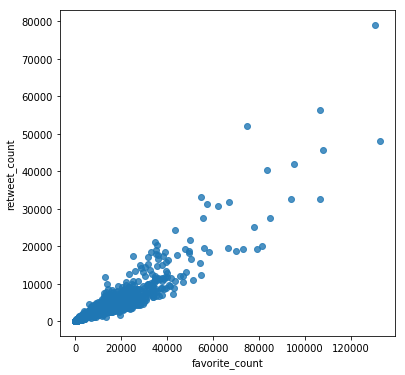

In [95]:
#绘制散点图
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (6, 6))
x = df_fvrt_ret.favorite_count
y = df_fvrt_ret.retweet_count
plt.scatter(x, y, alpha = 0.8)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

**结论**  
从图中可以观察到，点赞数favorite_count和转发数retweet_count有很强的正相关关系，favorite_count越高，retweet_count越大

**不同成长阶段的狗的评分相同吗？**  

*--根据项目审阅结果修改--*  
提取狗成长阶段数据和评分数据，进行分析  

In [96]:
#选择成长阶段非空的数据
df_stg_rat = df[['stage', 'rating']][df.stage.notnull()]

In [97]:
#不同阶段狗的评分均值
df_stg_rat.groupby('stage').mean()

,rating
stage,
doggo,1.180882
"doggo,pupper",1.233333
floofer,1.200000
"floofer,doggo",1.100000
pupper,1.060759
"pupper,doggo",1.033333
puppo,1.211111
"puppo,doggo",1.300000


在stage列，存在一行数据中包含了不只一个值，对这些数据进行处理：  
将stage列中的多个值进行拆分，形成多行数据

In [98]:
#拆分
split = df_stg_rat['stage'].str.split(',', expand=True).stack()

In [99]:
#充值索引后重命名
split_reset = split.reset_index(level=1,drop=True).rename('stage')

In [100]:
#重新聚合后分组
df_stg_rat = df_stg_rat.drop('stage', axis=1).join(split_reset)
df_stg_rat.groupby('stage').mean()

,rating
stage,
doggo,1.173750
floofer,1.187500
pupper,1.062249
puppo,1.217241


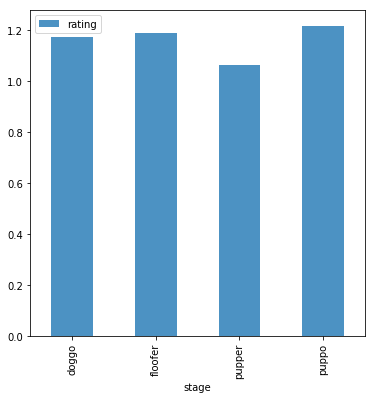

In [101]:
#绘制条形图
df_stg_rat.groupby('stage').mean().plot(kind = 'bar', figsize = (6, 6), alpha = 0.8)

从分组计算结果和条形图可以看出，所有阶段的狗狗评分很接近，都在1.1-1.2左右，处于‘puppo’阶段的狗狗的评分均分最高，其次是‘doggo’阶段的狗狗，处于‘pupper’阶段的狗狗评分均分最低

**那些品种的狗更受欢迎？**  

*--根据项目审阅结果修改--*  
提取狗的品种数据和点赞数，进行分析

In [102]:
df_vrt_fvt = df[['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog', 'favorite_count']]

In [103]:
#提取狗的品种，如果第一次预测是True就取第一次预测的结果，为False就按相同逻辑取第二次预测第三次预测的结果
def get_breed(item):
    if item['p1_dog'] == True:
        item['variety'] = item['p1']
    elif item['p2_dog'] == True:
        item['variety'] = item['p2']
    elif item['p3_dog'] == True:
        item['variety'] = item['p3']
    else:
        item['variety'] = np.nan
    return item
df_vrt_fvt = df_vrt_fvt.apply(get_breed, axis=1)

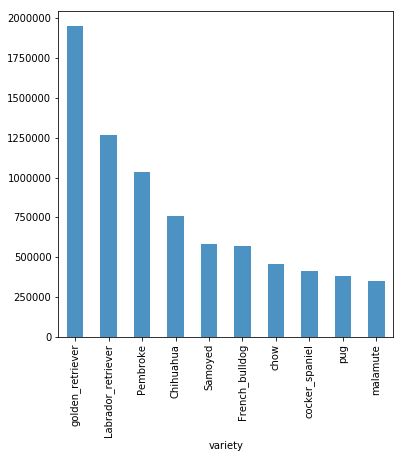

In [104]:
#计算各品种的点赞数之和，取前十名，绘制条形图
df_vrt_fvt.groupby('variety')['favorite_count'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (6, 6), alpha = 0.8)

In [105]:
#查看前十名数据
df_vrt_fvt.groupby('variety')['favorite_count'].sum().sort_values(ascending = False).head(10)

variety
golden_retriever      1950826
Labrador_retriever    1269771
Pembroke              1036321
Chihuahua              756715
Samoyed                582082
French_bulldog         568978
chow                   456699
cocker_spaniel         413968
pug                    382463
malamute               350710
Name: favorite_count, dtype: int64

通过条形图和数据集可以看出，品种为golden_retriever的狗狗点赞数最多，其次是品种为Pembroke的狗狗

## 总结

通过以上分析可以得出以下结论：
- 点赞数favorite_count和转发数retweet_count有很强的正相关关系，favorite_count越高，retweet_count越大
- 所有阶段的狗狗评分很接近，都在1.1-1.2左右，处于‘puppo’阶段的狗狗的评分均分最高，其次是‘doggo’阶段的狗狗，处于‘pupper’阶段的狗狗评分均分最低
- 品种为golden_retriever的狗狗点赞数最多，其次是品种为Pembroke的狗狗

## 参考文档
- https://discussions.youdaxue.com/t/topic/64079